In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string
import scipy

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Plan on attack!

- read in folder containing data files
- for each data file
    - clean (update column names, drop first 2 rows with param metadata)
- for final data frame
    - reset_index for each animal separately (so have same time series)
    - update data types
    - filter out bad data (use error codes)
    
- questions to figure out
    - are some error codes more common at beginning of recording etc


### Get and clean data

In [3]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single'

#create list of data files provided by Microbiome Insights 
files = os.listdir(path)

data_file_paths = []
for file in files:
    file_path = path + '/' + file
    data_file_paths.append(file_path)
    
data_file_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1370_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1367_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1363_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1364_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1360_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1359_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1369_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1368_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1361_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1365_050521_EX.txt',
 '/Users/abbieschindler/Documents/Schind

In [10]:
data_start = pd.read_table(data_file_paths[0], sep=',') 
data_start = pd.DataFrame(data = data_start)
print(data_start.shape) #
data_start.head()

(6902, 14)


,Elapsed,Custom ID,Subject,File,Error,Arterial O2,Heart,Breath,Pulse,Breath.1,Activity,Core,Computer,15Hz
0,Time,NaN,Number,Marker,Code,Saturation,Rate,Rate,Distention,Distention,,Temperature,Clock,NaN
1,(sec),NaN,(#),(#),,(%),(bpm),(brpm),(um),(um),,(C/F),NaN,NaN
2,0,Subject 1,1,1,0,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,NaN
3,.07,Subject 1,1,1,0,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,NaN
4,.13,Subject 1,1,1,0,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,NaN


In [11]:
final_data = pd.DataFrame()

for file in data_file_paths:
    print(file)
    
    if file.split('/')[-1] == '.DS_Store':
        continue
     
    #get file meta data
    animal = file.split('/')[-1].split('_')[0]
    date = file.split('/')[-1].split('_')[1]
    
    #make dataframe
    data_int = pd.read_table(file, sep=',') 
    data_int = pd.DataFrame(data = data_int)
    
    #drop un used columns
    data_int = data_int.drop(['Custom ID', 'Subject', 'File', 'Core', '15Hz'], axis=1)
    
    #update columns names
    data_int.columns = ['time_sec', 'error_code', 
                        'O2_sat', 'hr_bpm', 'br_brpm', 'pd_um', 'bd_um', 'activity', 'datetime']
    
    #drop rows with param meta data
    data_int = data_int.drop([0, 1], axis=0)
    
    #add meta data
    data_int['animal'] = animal
    data_int['date'] = date
        
    #reset time index
    if final_data.empty:
        final_data = data_int
    else:
        final_data = pd.concat([final_data, data_int], axis=0)
        
    print(final_data.shape,'\n')
    
final_data.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1370_050521_EX.txt
(6900, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1367_050521_EX.txt
(13160, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1363_050521_EX.txt
(23560, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1364_050521_EX.txt
(32560, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1360_050521_EX.txt
(38340, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1359_050521_EX.txt
(44480, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1369_050521_EX.txt
(50960, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1368_050521_EX.txt
(56740, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1361_050521_EX.txt
(61380, 11) 

/Users/abbieschindler/Documents/Schindler_Lab/D

,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime,animal,date
2,0,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
3,.07,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
4,.13,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
5,.2,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
6,.27,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521


In [15]:
data_final_clean = final_data[['time_sec', 'animal', 'error_code', 
                                           'O2_sat', 'hr_bpm', 'br_brpm','pd_um', 
                                           'bd_um', 'activity']].astype(float)

data_final_clean['datetime'] = final_data['datetime']
data_final_clean['animal'] = final_data['animal']
data_final_clean['date'] = final_data['date']

data_final_clean['datetime'] = pd.to_datetime(data_final_clean['datetime'])

#update column order
data_final_clean =  data_final_clean[['date', 'animal', 'time_sec', 'error_code', 'O2_sat', 
                            'hr_bpm', 'br_brpm', 'pd_um', 'bd_um', 'activity', 'datetime']]

data_final_clean.head()

,date,animal,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime
2,050521,1370,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
3,050521,1370,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
4,050521,1370,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
5,050521,1370,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
6,050521,1370,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48


### viz/drop data that is 'unsure'

In [16]:
data_final_clean['animal'].value_counts()

1363    10400
1364    9000 
1362    8160 
1370    6900 
1369    6480 
1367    6260 
1359    6140 
1365    5780 
1360    5780 
1368    5780 
1366    5700 
1361    4640 
Name: animal, dtype: int64

<AxesSubplot:xlabel='error_code', ylabel='count'>

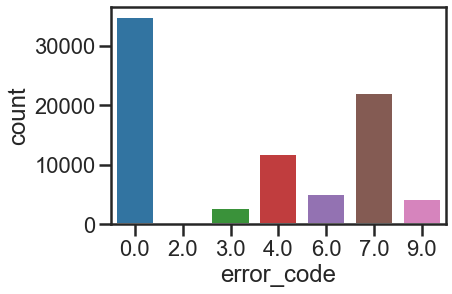

In [20]:
sns.countplot(x='error_code', data=data_final_clean)

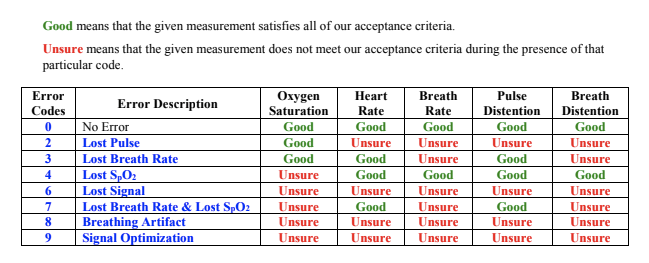

In [27]:
def raster_error_code(data, animal, error_list, error_names):
    data_dict = {}
    colorCodes = ['C{}'.format(i) for i in range(len(error_list))]
    
    data_int = data_final_clean[data_final_clean['animal']==animal]

    for code in error_list:

        data_dict[code] = data_int[data_int['error_code'] == code]['time_sec'].values
        
    # Draw a spike raster plot
    plt.figure(figsize=(50,15))
    params = {'axes.labelsize': 75,
              'axes.titlesize': 75}
    plt.rc('xtick', labelsize=40) 
    plt.rc('ytick', labelsize=40) 
    plt.rcParams.update(params)
    plt.yticks(np.arange(0,len(error_list)), error_names) 
    plt.eventplot(data_dict.values(), color=colorCodes, linelengths = 0.3) 
    plt.xlabel('Time')
    plt.ylabel('Error Code')


    plt.show()    


1370


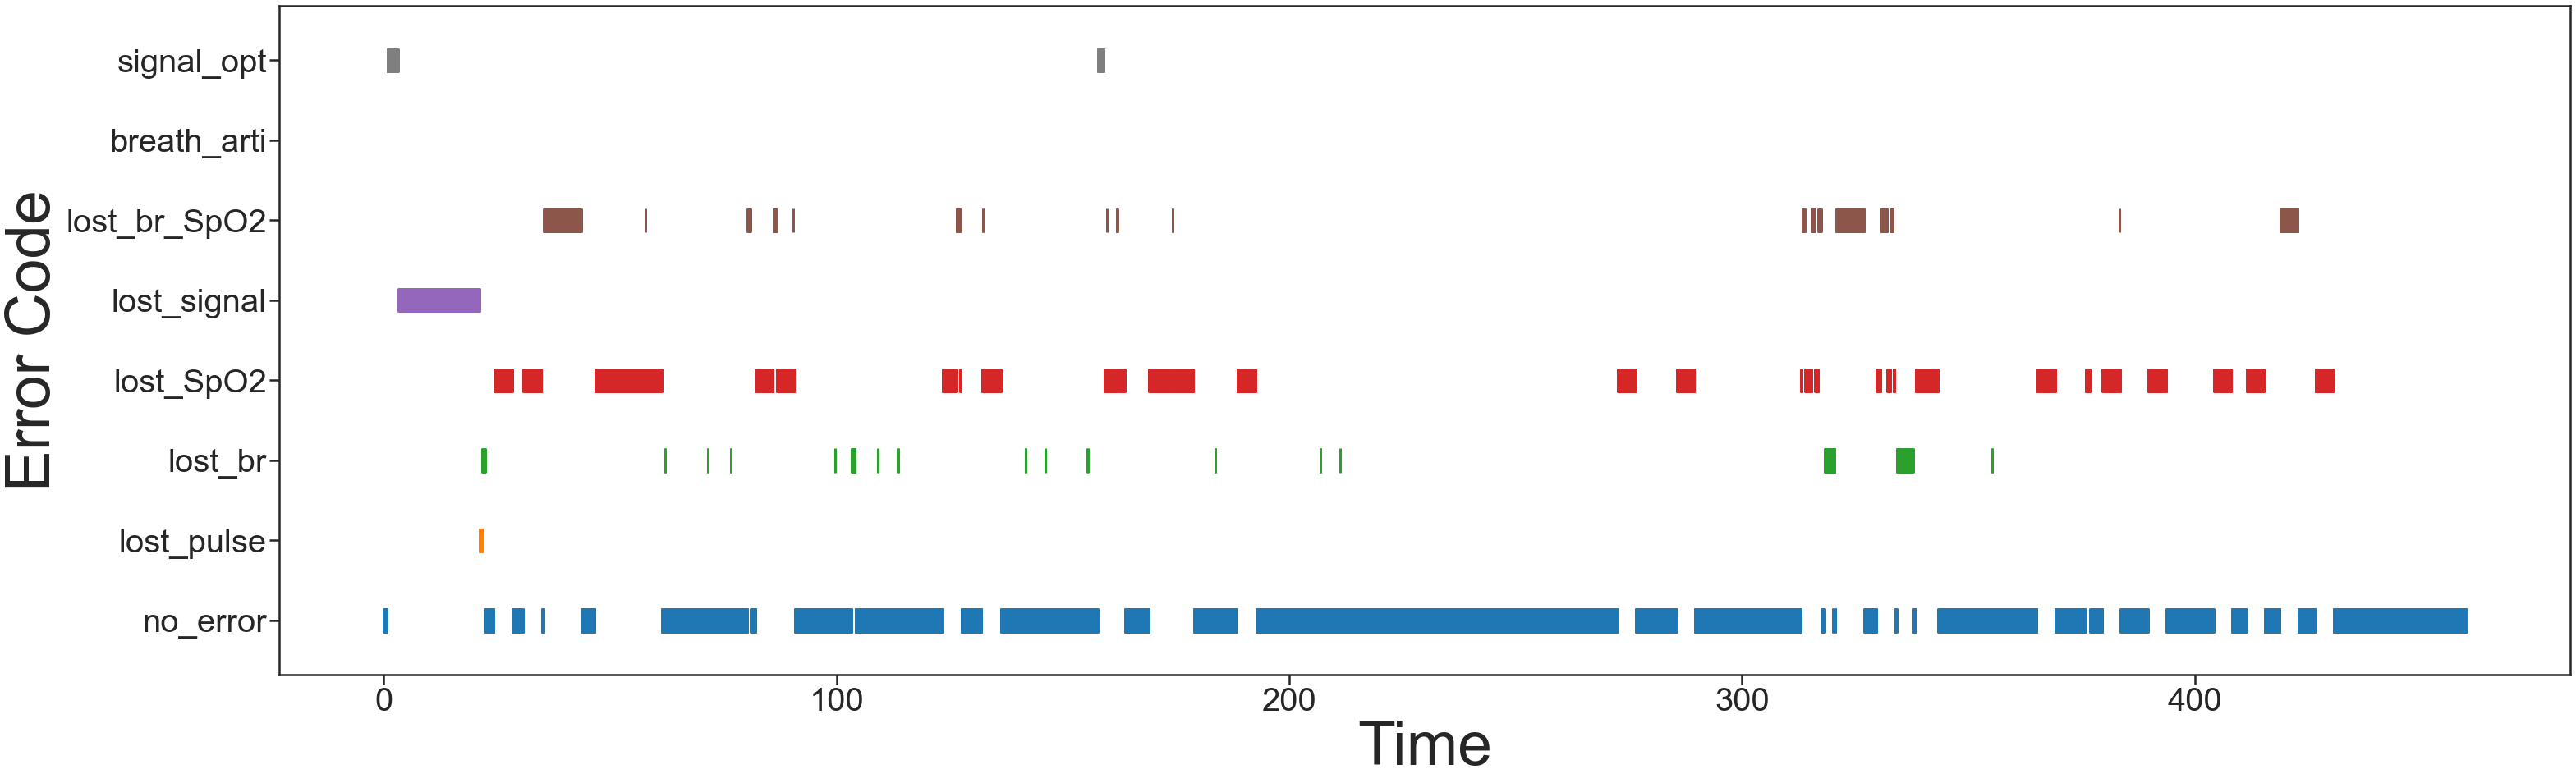

1367


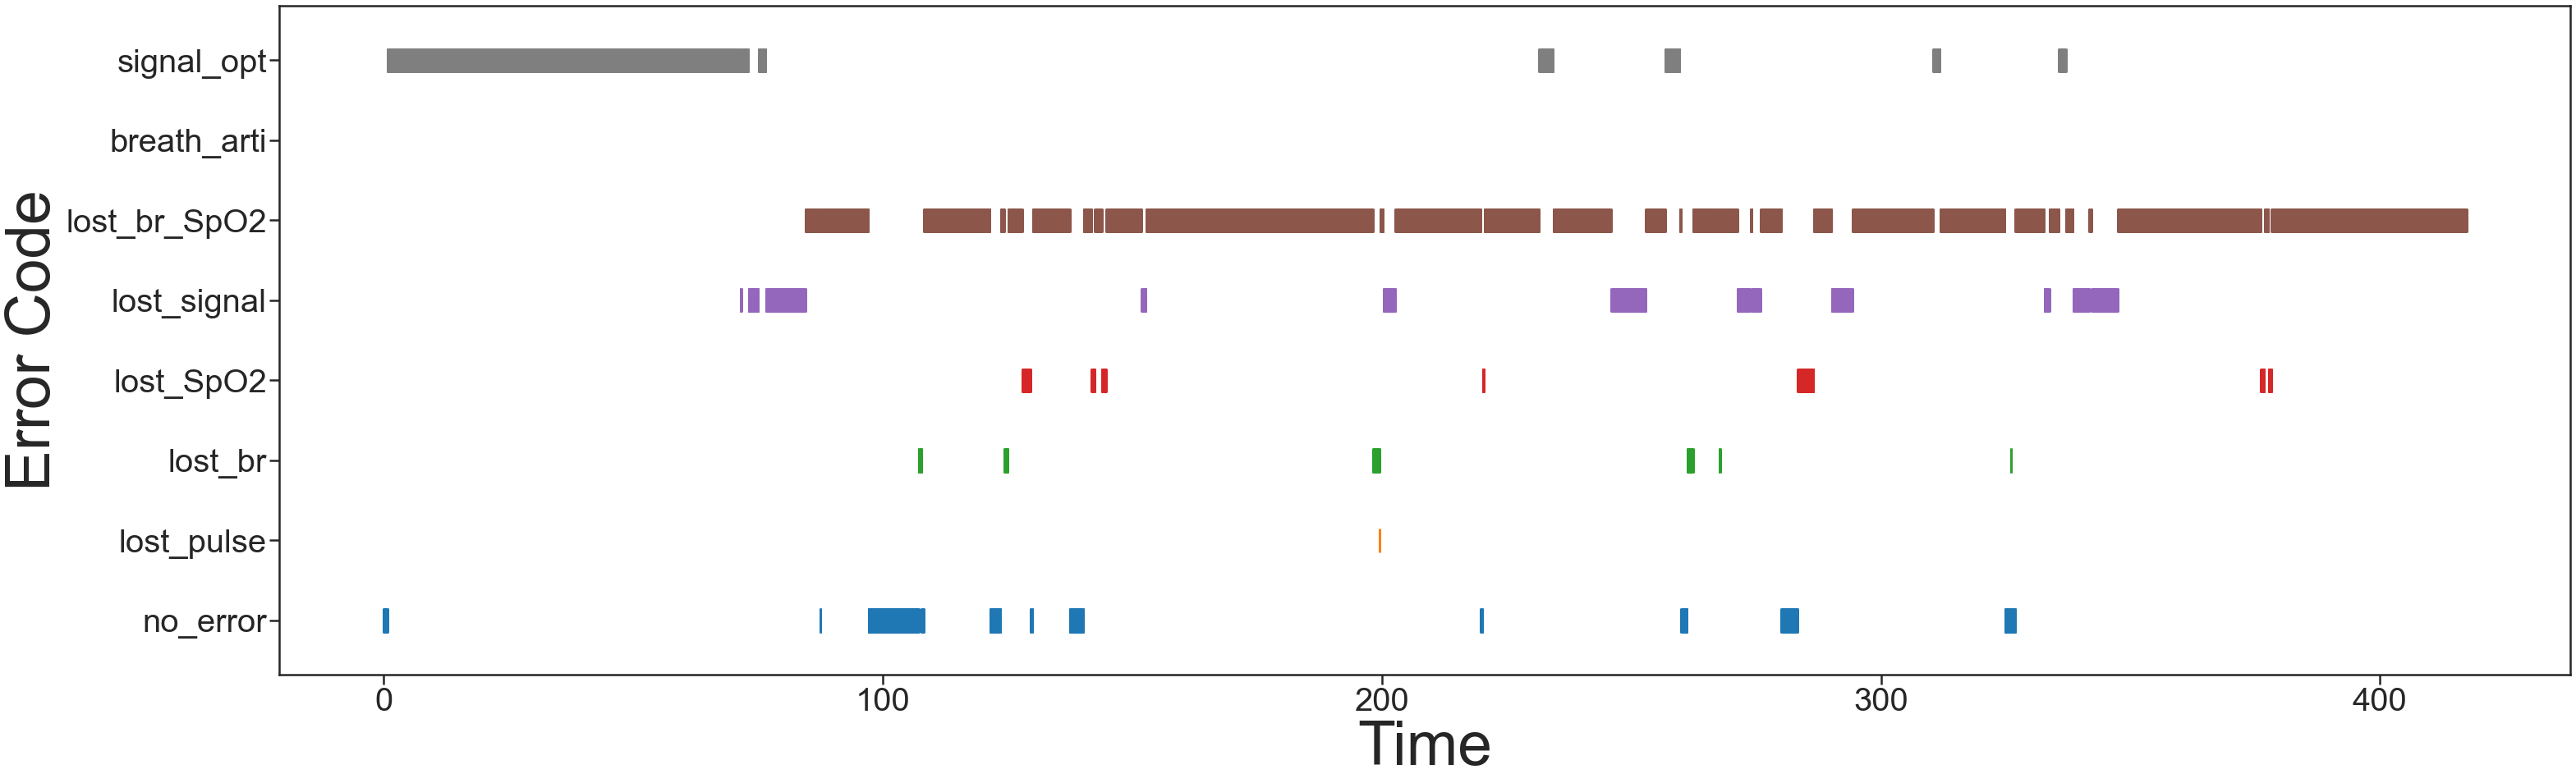

1363


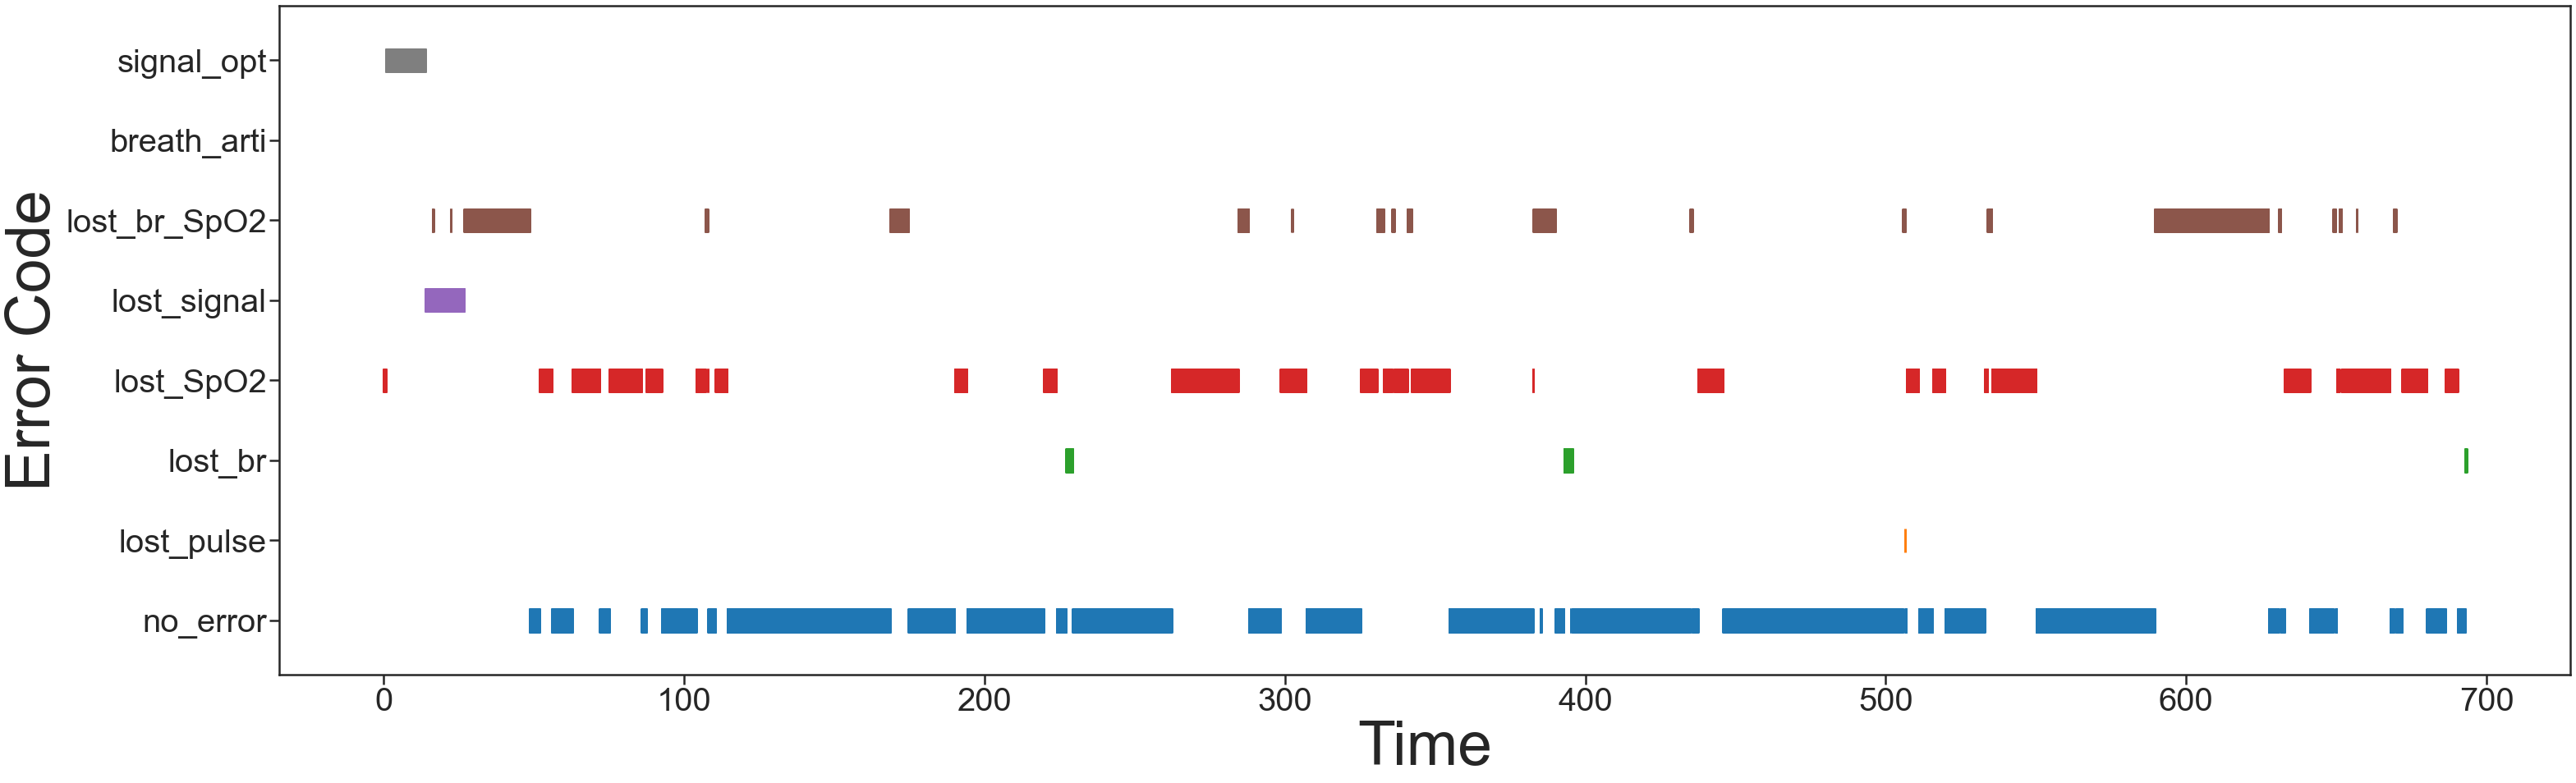

1364


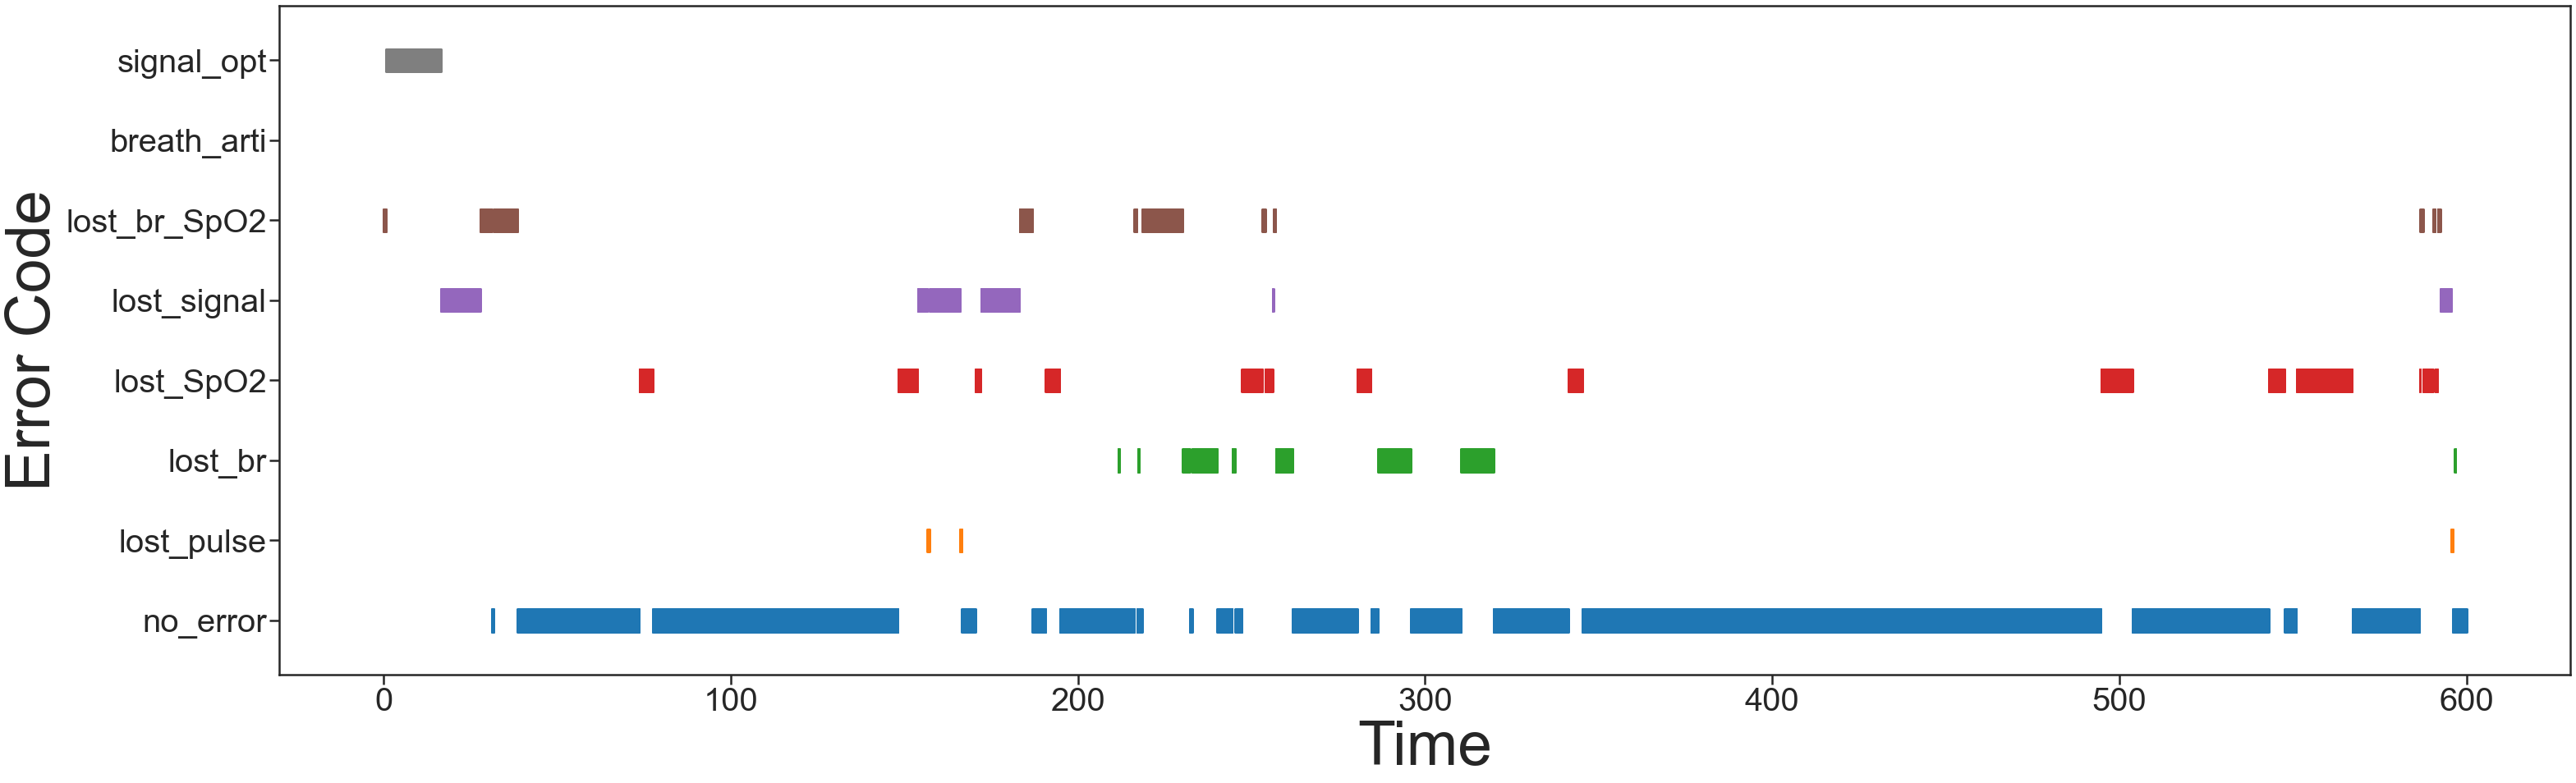

1360


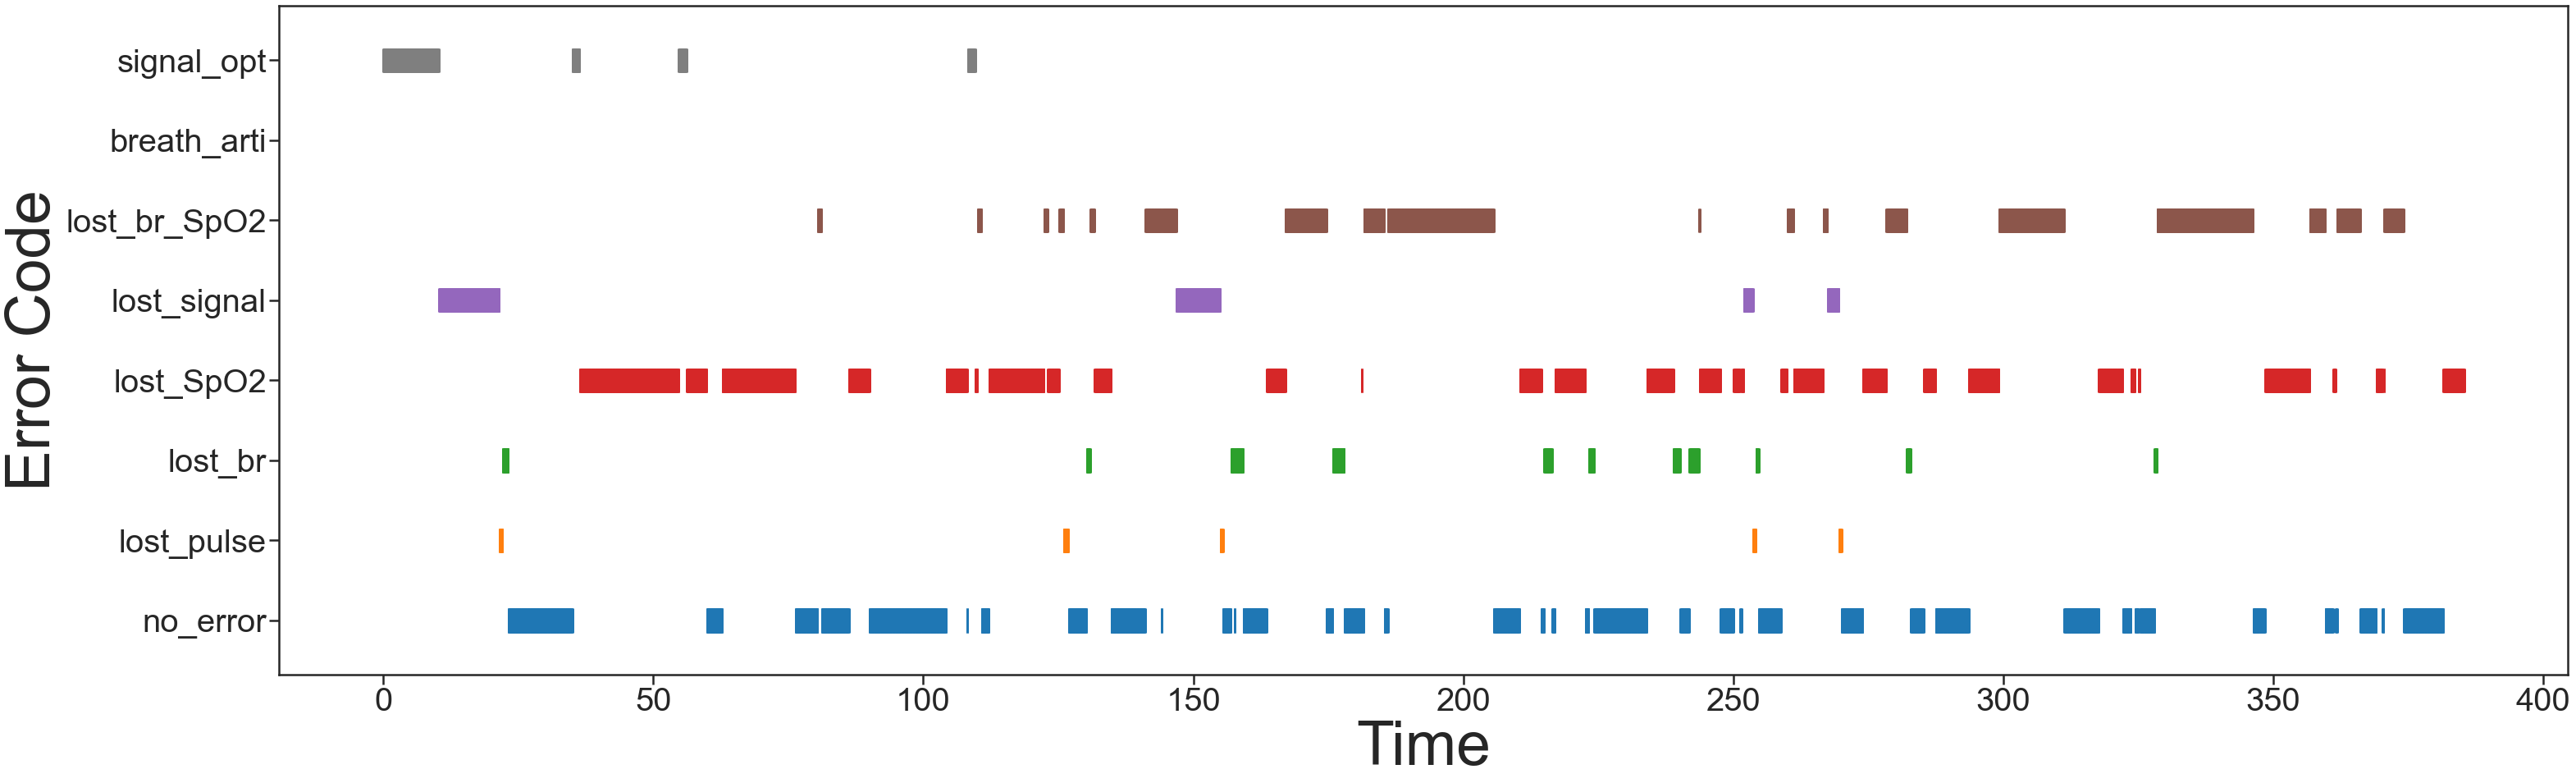

1359


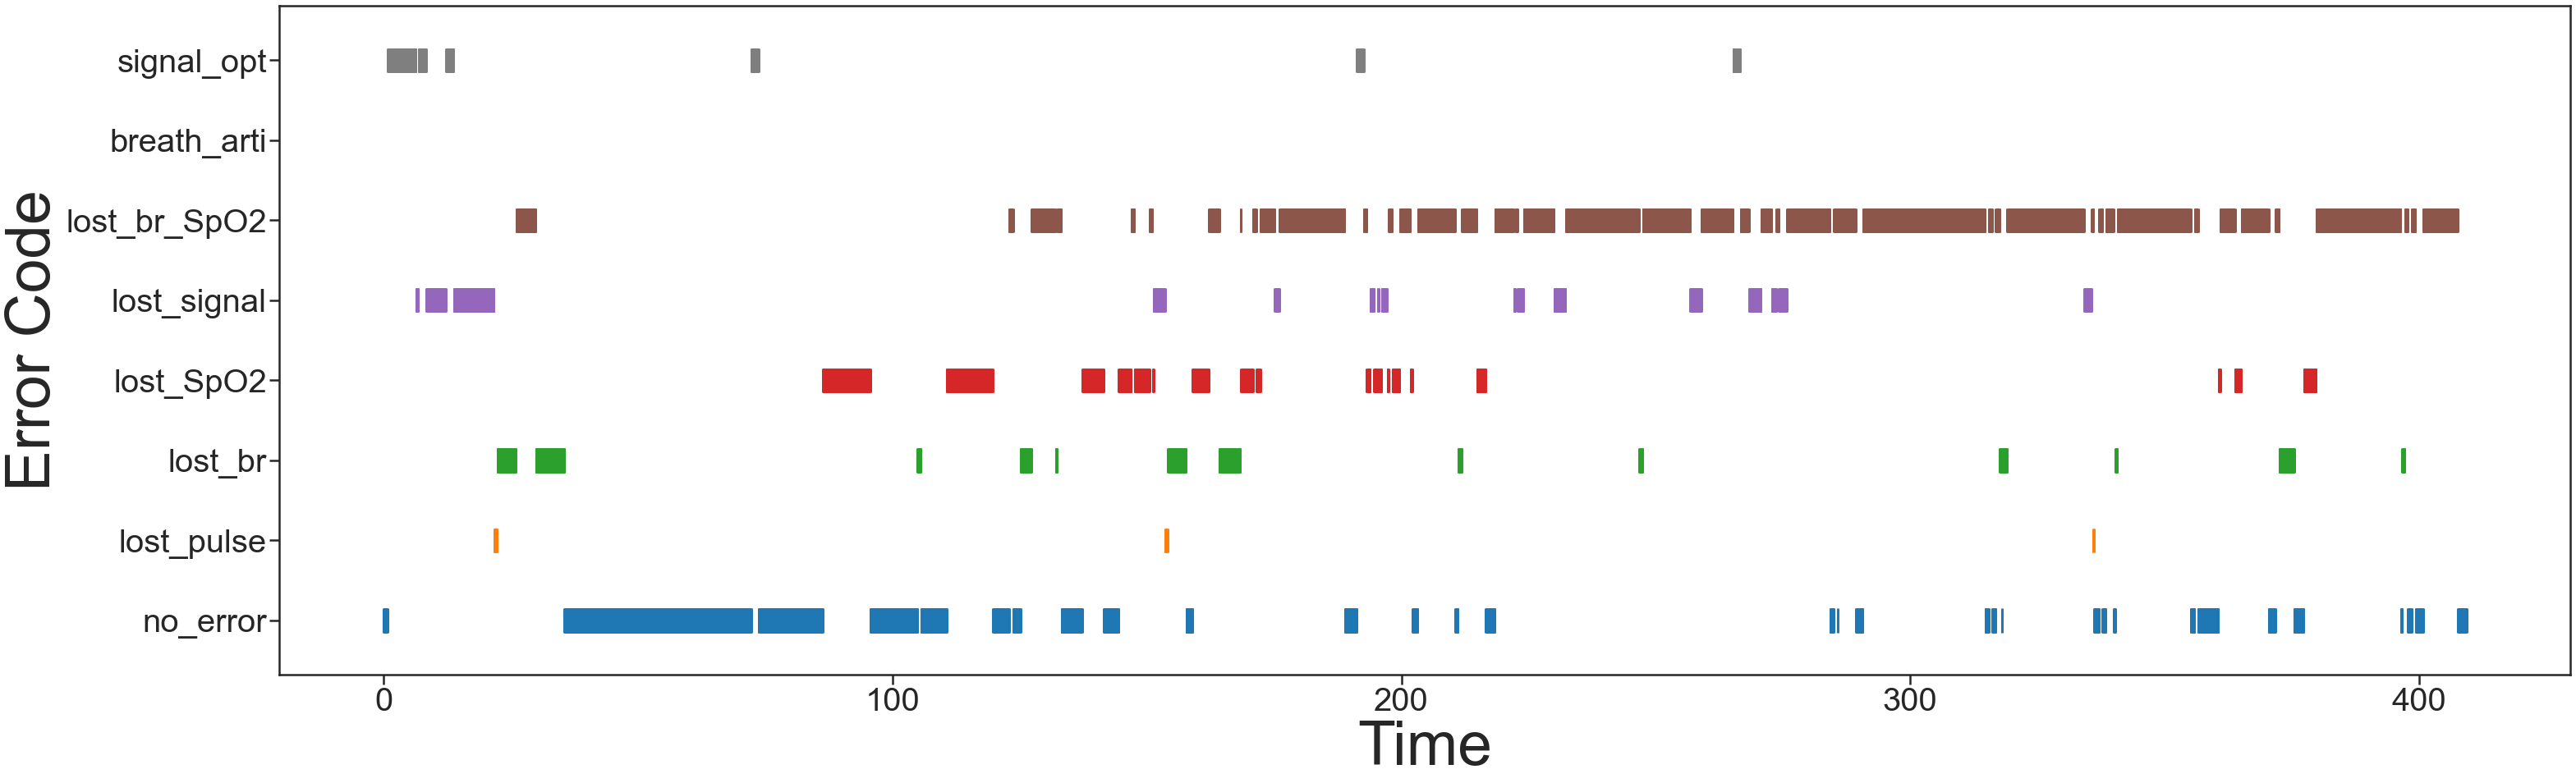

1369


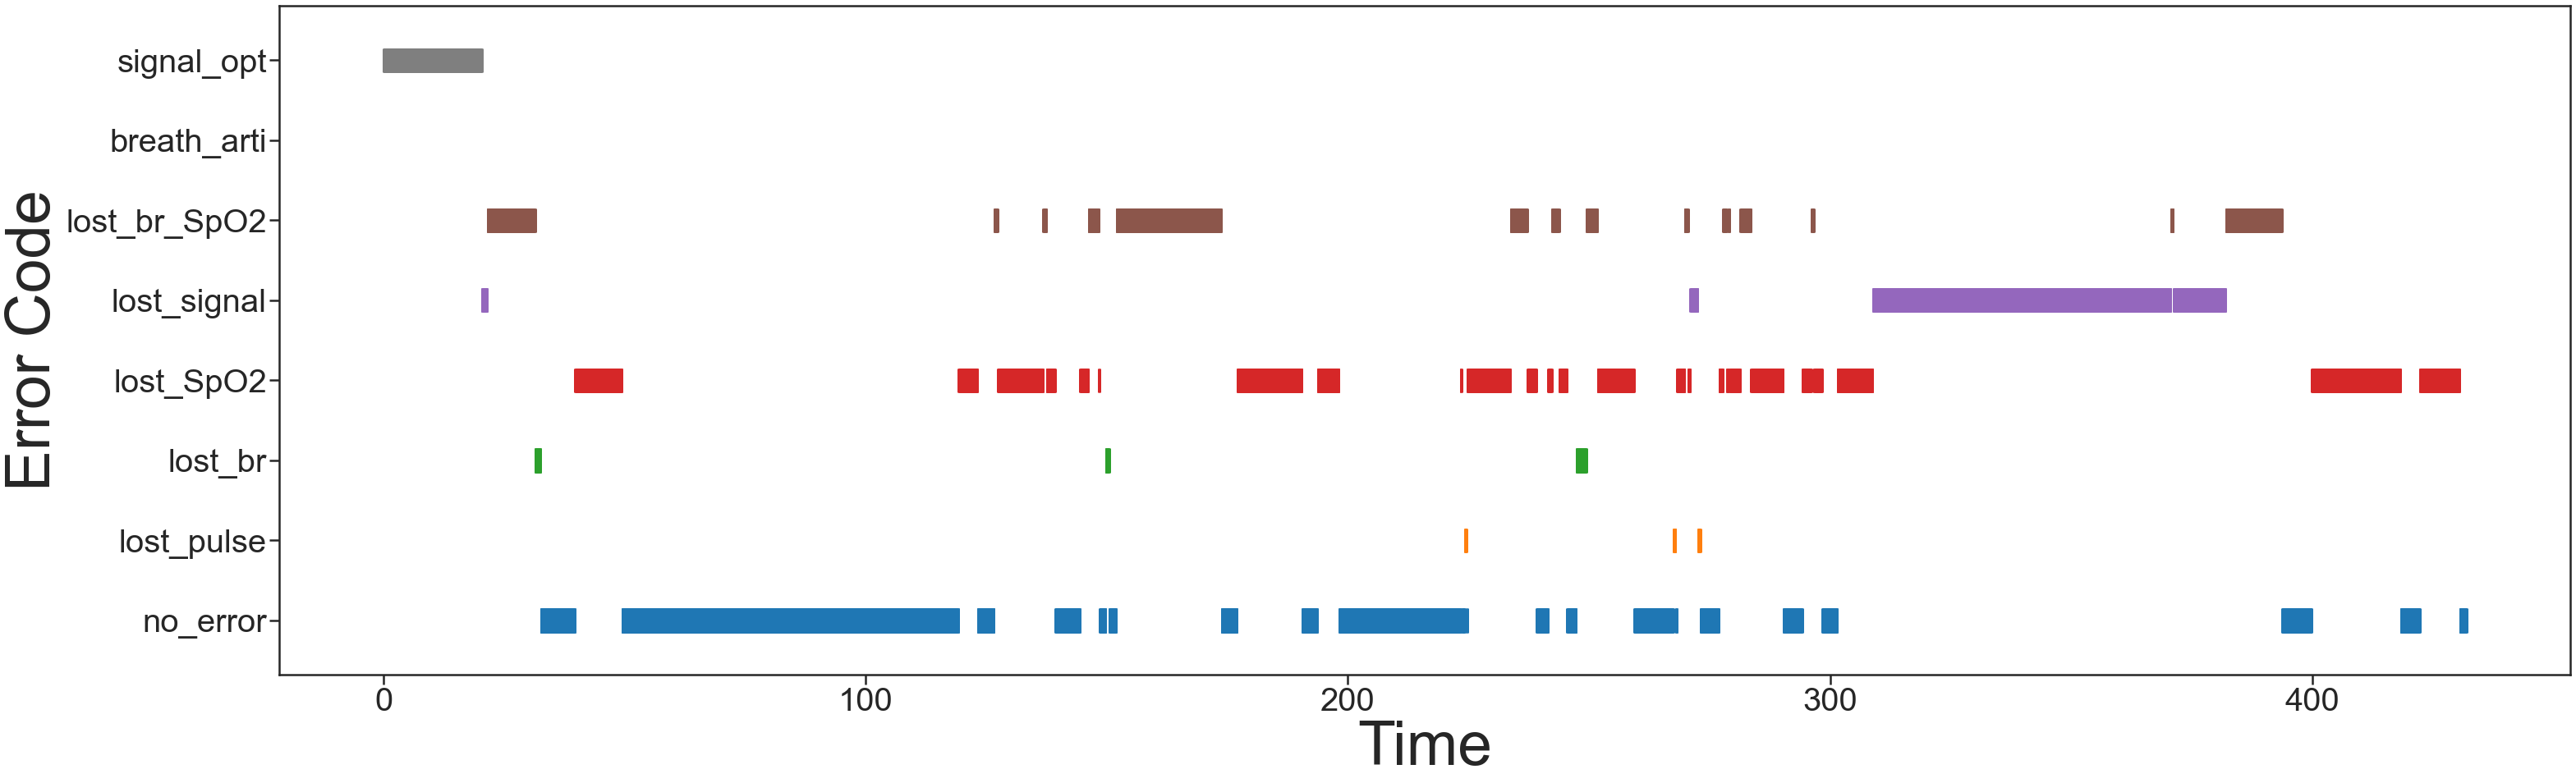

1368


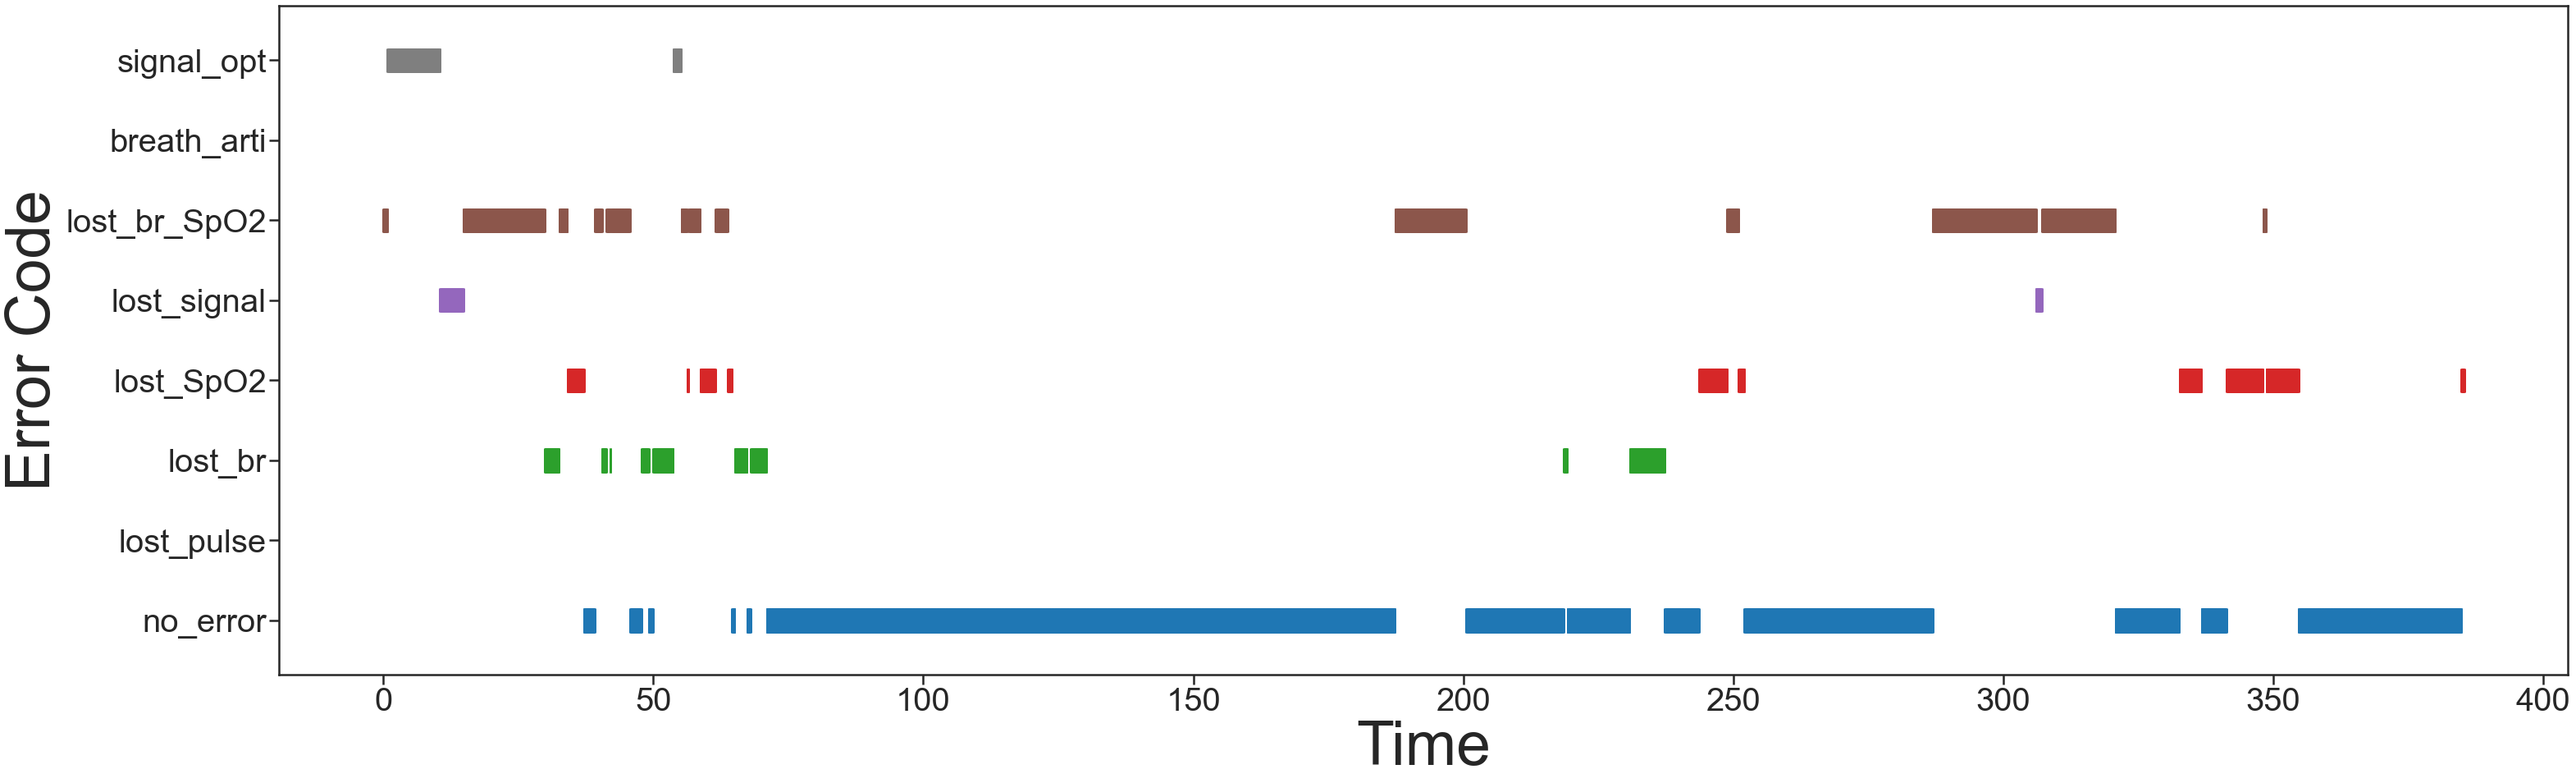

1361


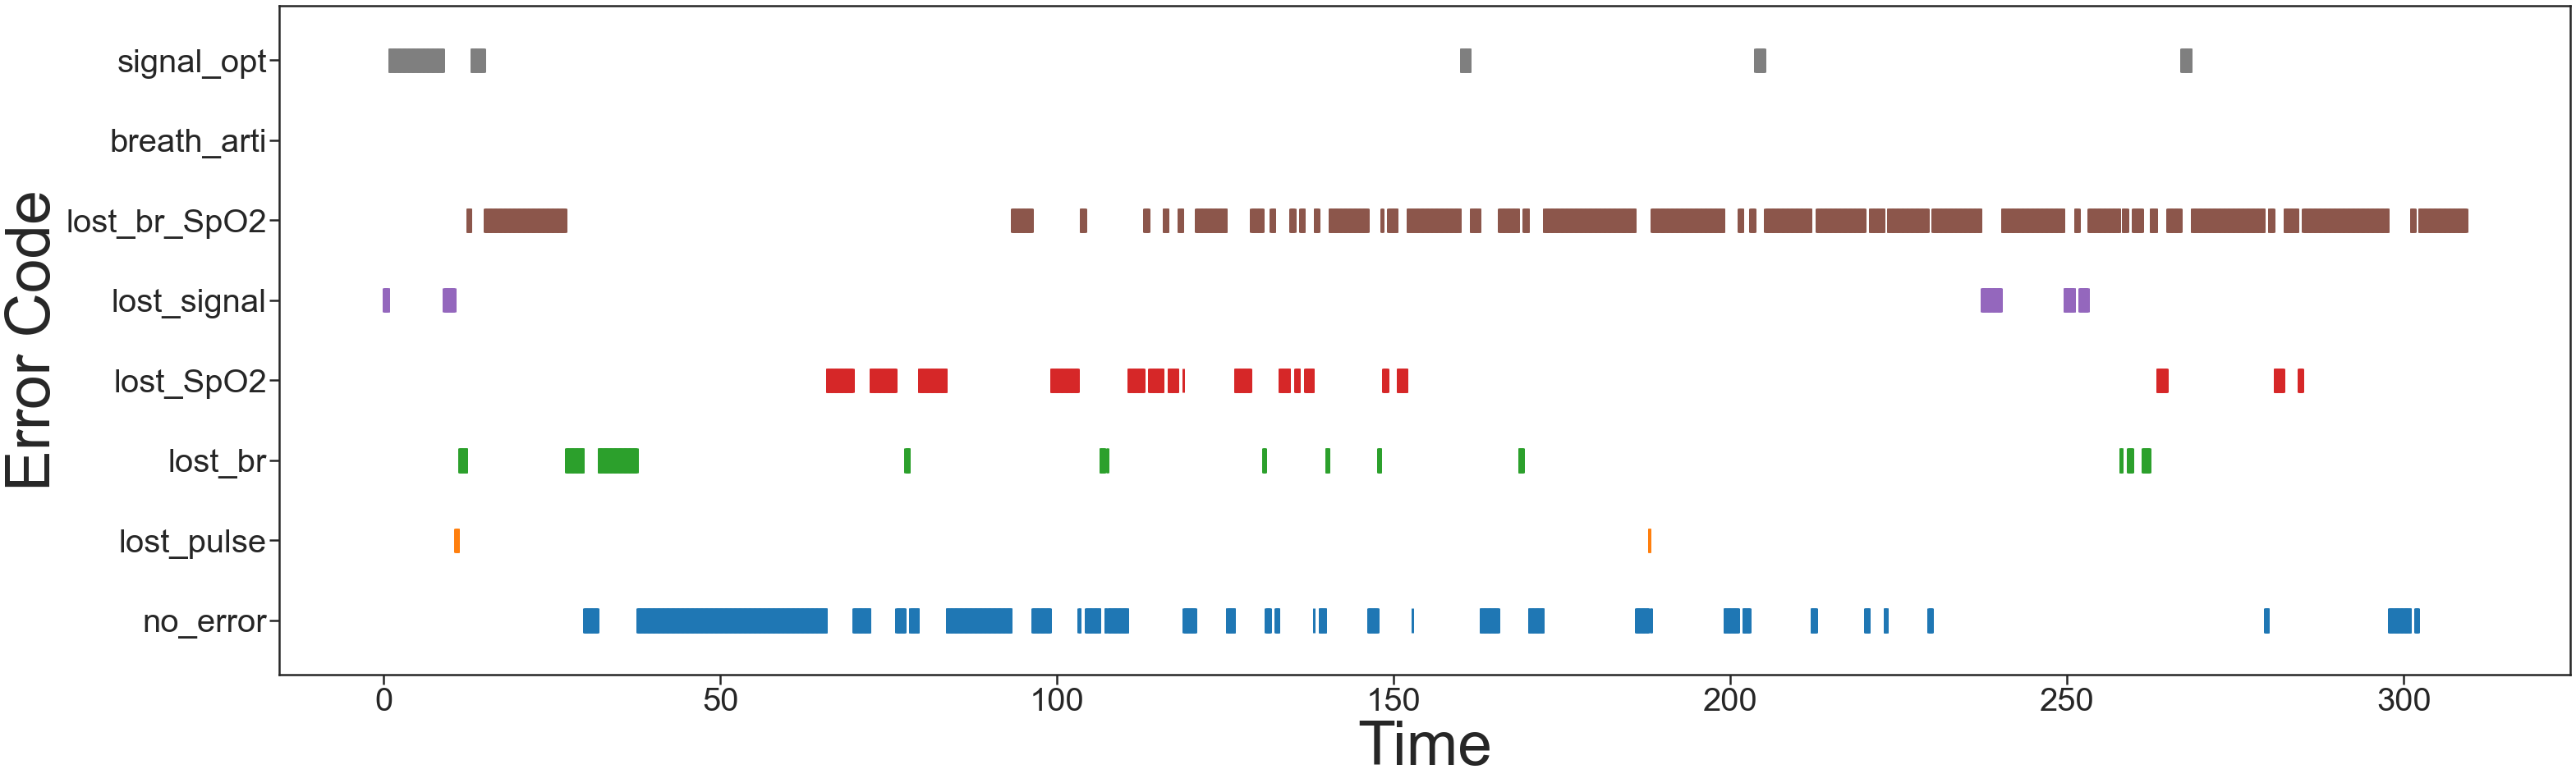

1365


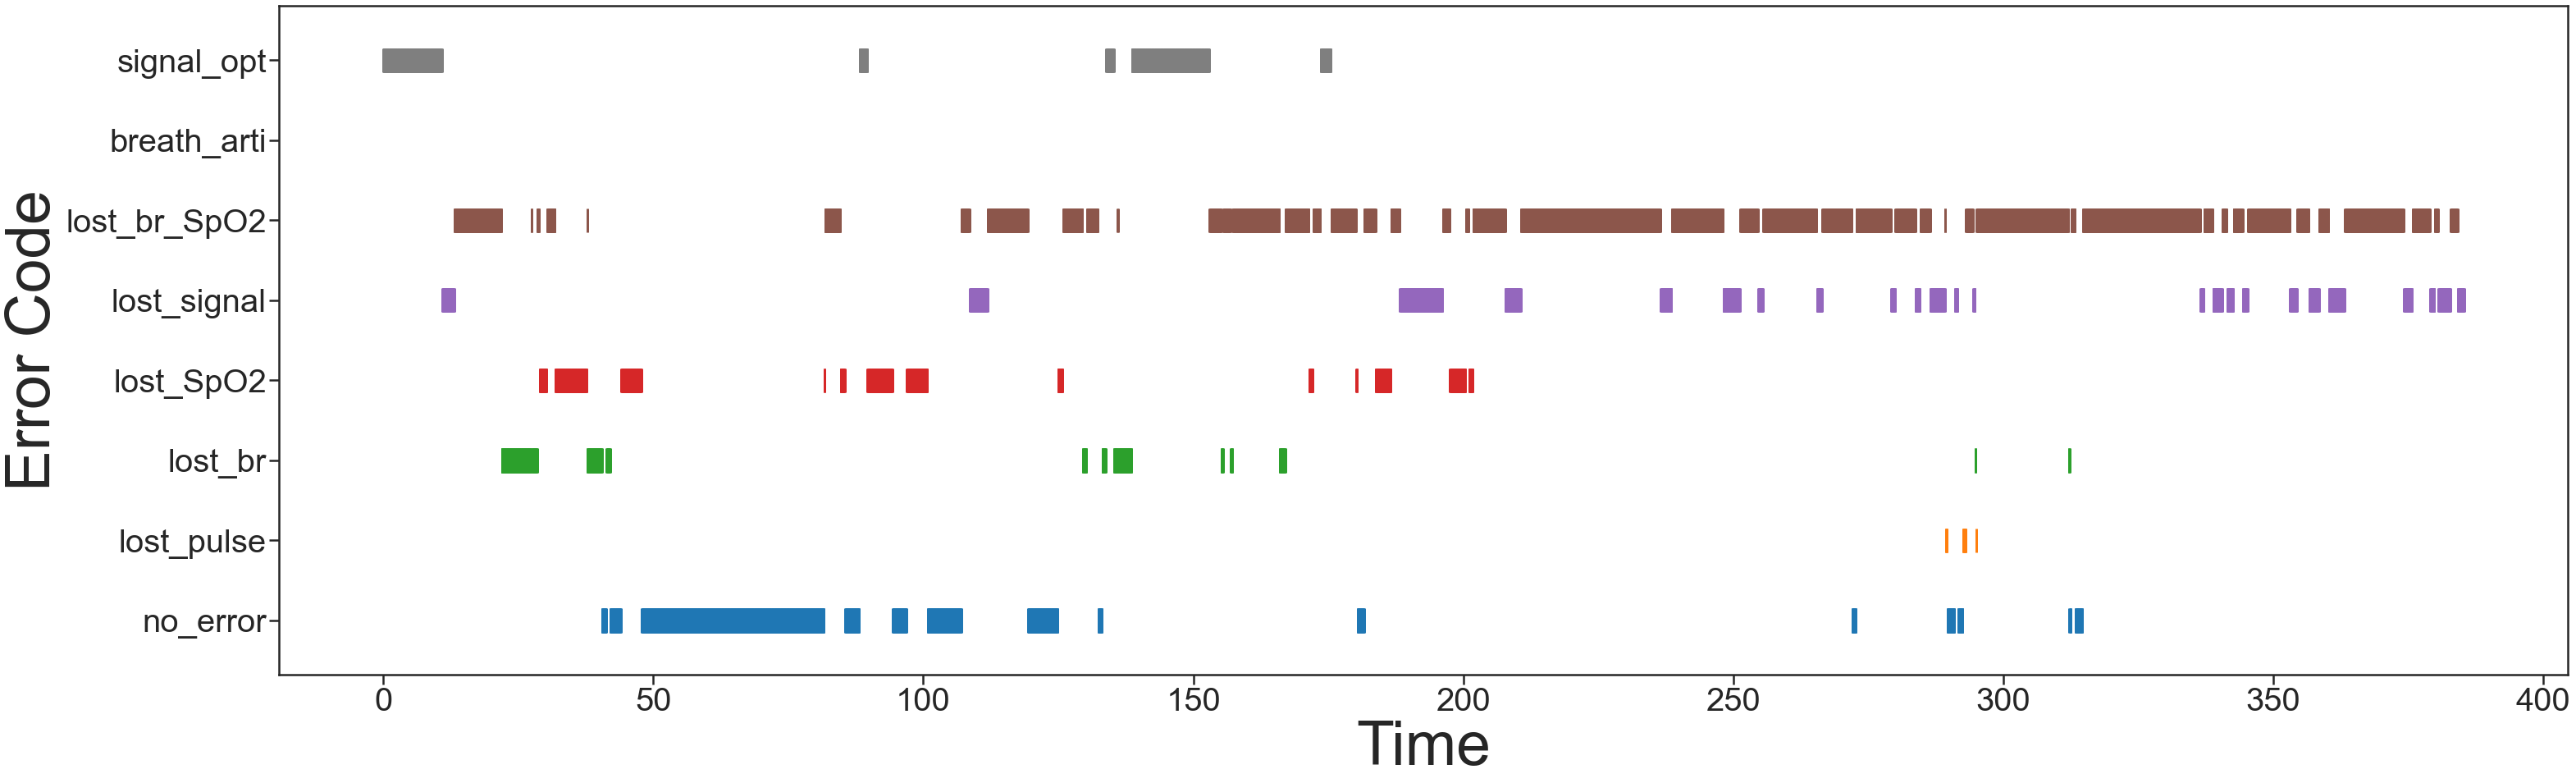

1362


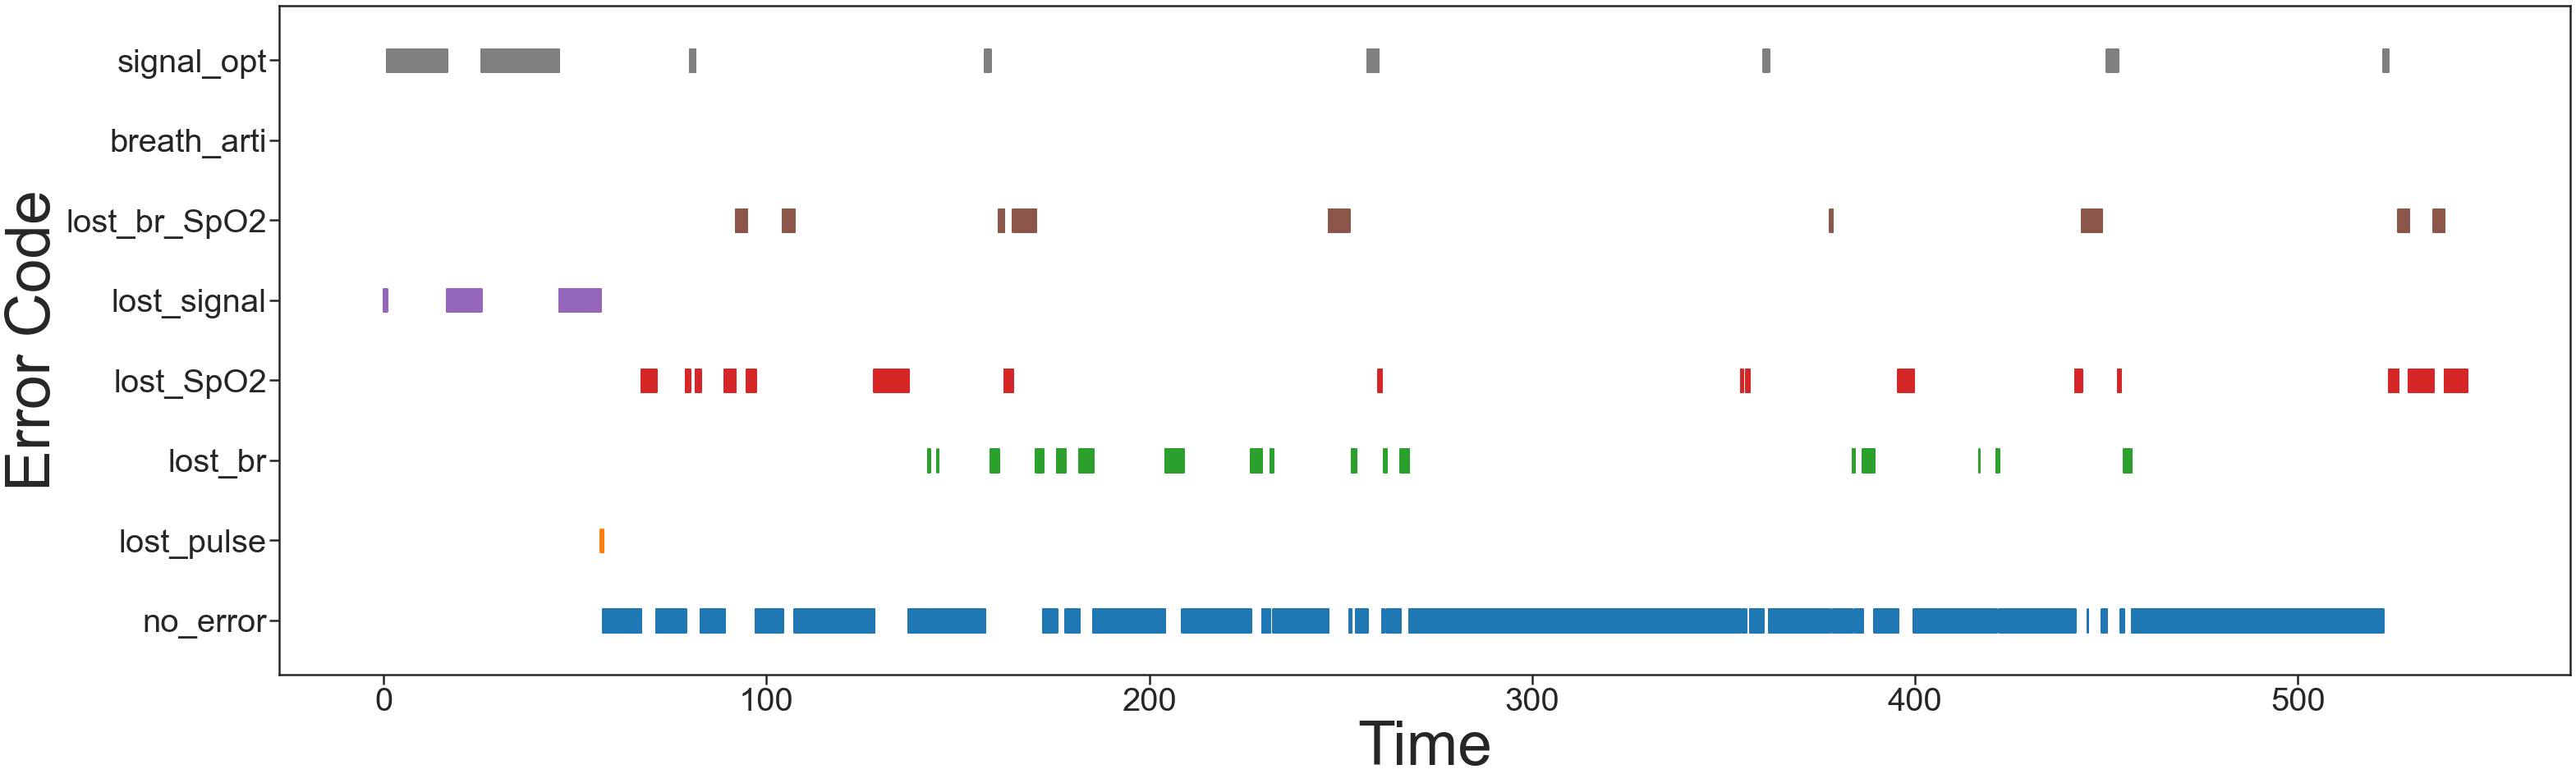

1366


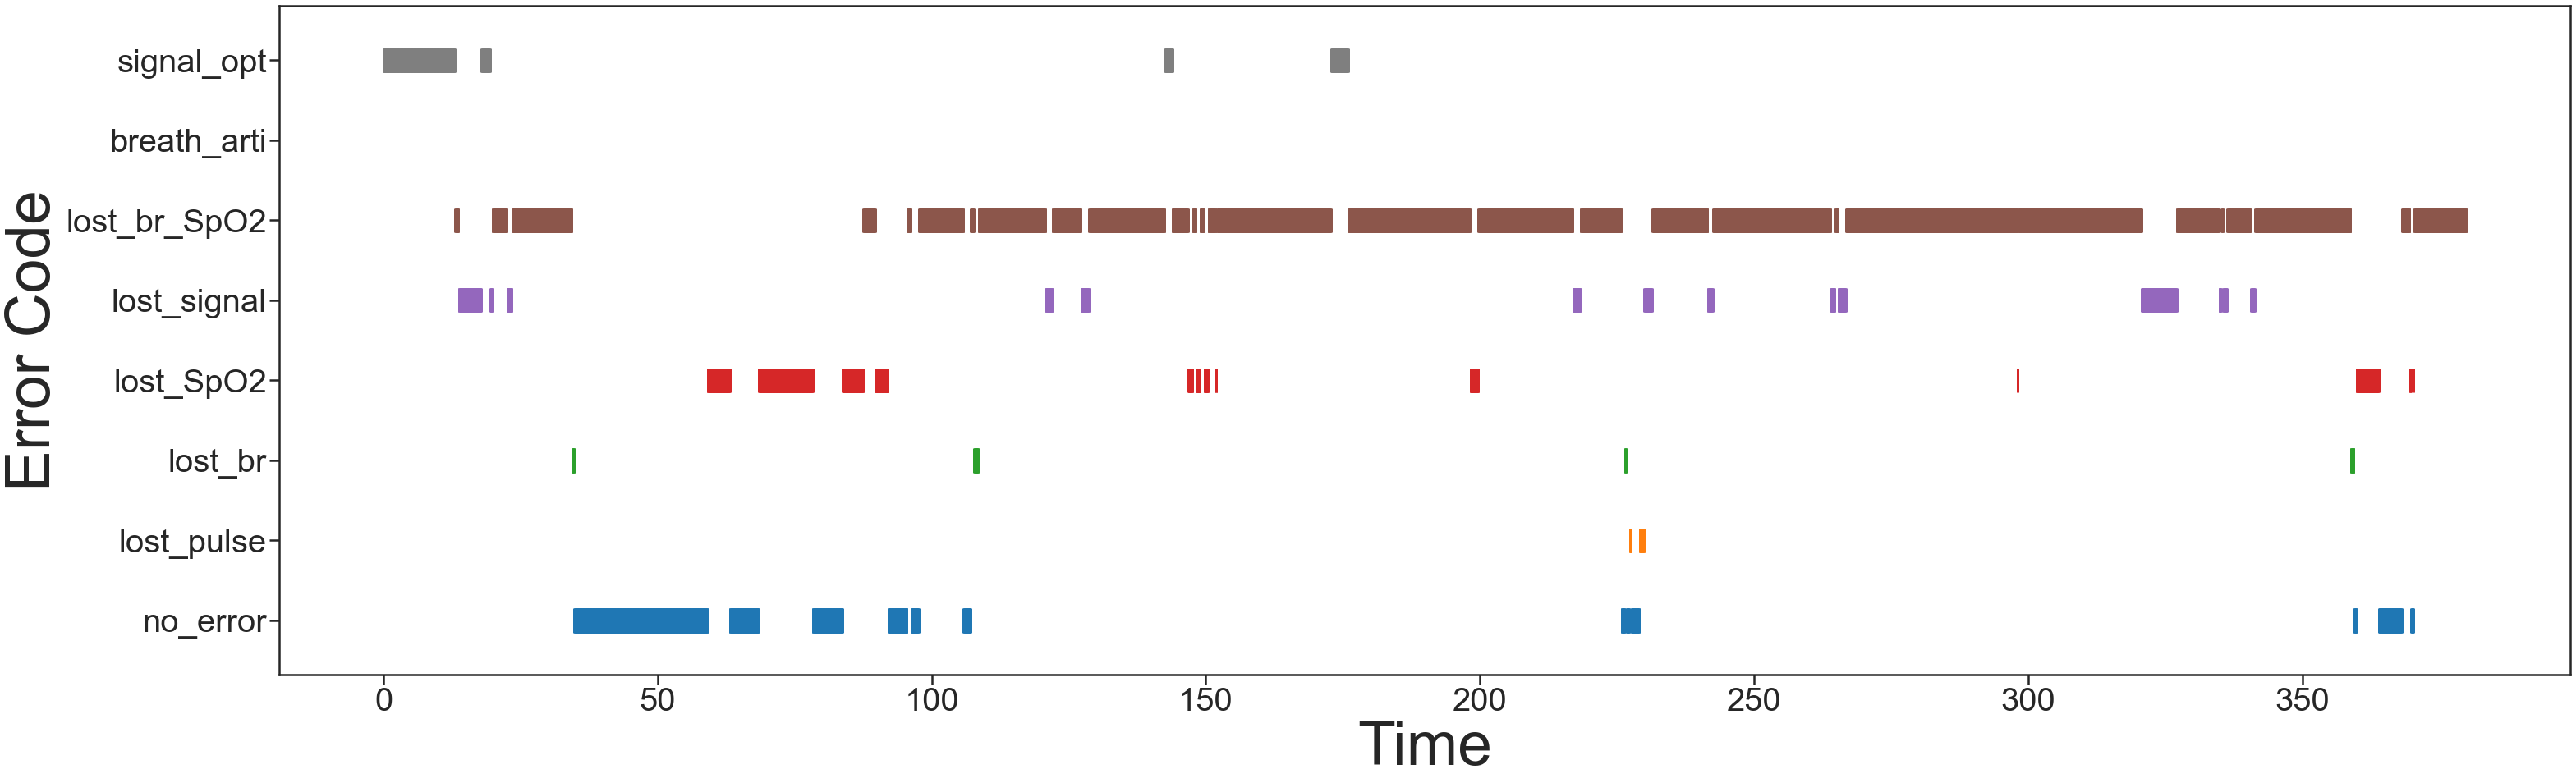

In [28]:
error_list = [0,2,3,4,6,7,8,9]
error_code = ['no_error', 'lost_pulse', 'lost_br', 'lost_SpO2', 'lost_signal', 'lost_br_SpO2', 'breath_arti', 'signal_opt']

for animal in data_final_clean['animal'].unique():
    print(animal)
    raster_error_code(data_final_clean, animal, error_list, error_code)


In [69]:
print(data_final_clean.shape)
data_hr = data_final_clean[data_final_clean['pd_um']>0]
print(data_hr.shape)
code_drops = [2,3,4,6,8,9]
data_hr = data_hr[~data_hr['error_code'].isin(code_drops)]
data_hr = data_hr[data_hr['time_sec']<400]
print(data_hr.shape)
data_hr.head()

(81020, 11)
(77324, 11)
(48072, 11)


,date,animal,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime
339,050521,1370,22.47,0.0,92.1,669.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:10
340,050521,1370,22.53,0.0,92.1,669.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:10
341,050521,1370,22.60,0.0,92.1,669.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:10
342,050521,1370,22.67,0.0,92.1,667.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:11
343,050521,1370,22.73,0.0,92.1,667.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:11


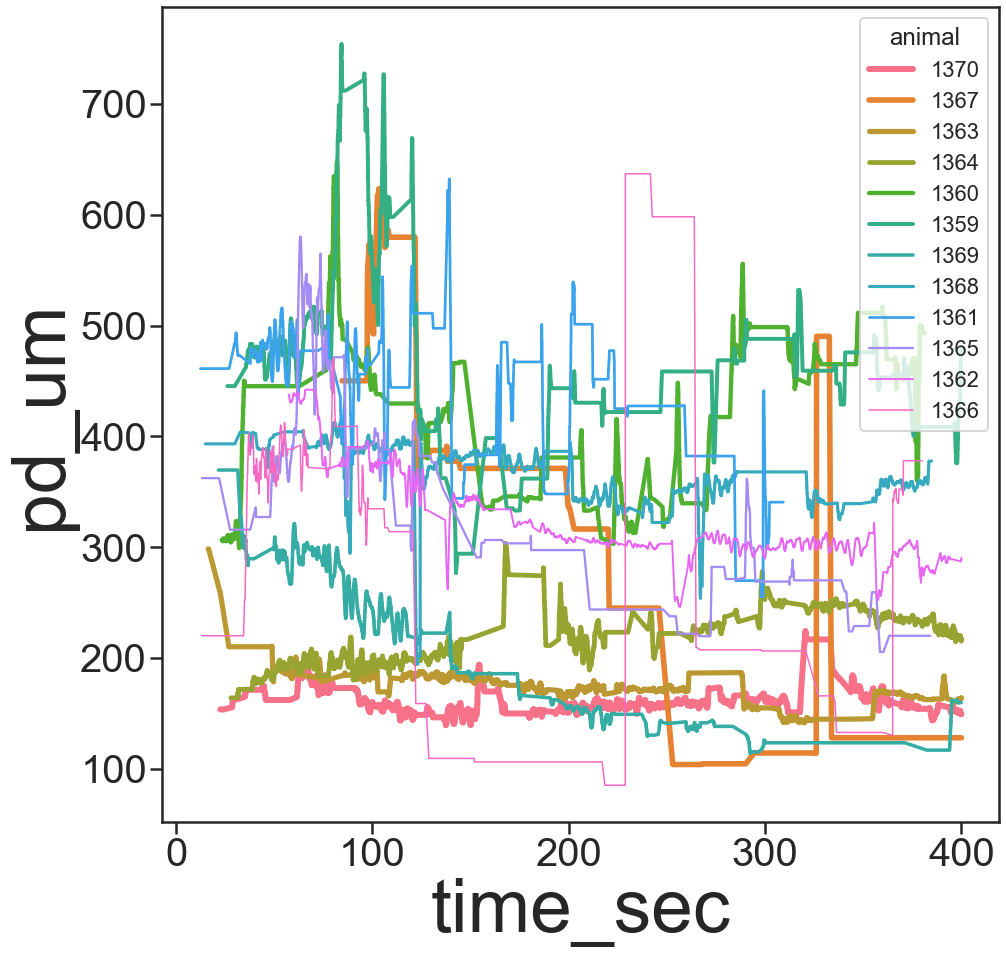

In [70]:
plt.figure(figsize=(15,15))
sns.lineplot(x='time_sec', y='pd_um', data=data_hr, ci=None, hue='animal', size='animal')
plt.show()